<a href="https://colab.research.google.com/github/premchand11/NLP-Sentiment-Analysis-for-US-Election/blob/main/NLP_Sentiment_Analysis_for_US_Election_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk
!pip install wordcloud
!pip install textblob

In [2]:
import nltk

nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Libraries for Sentiment Analysis
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
# reading datasets
trump = pd.read_csv("hashtag_donaldtrump.csv", lineterminator='\n')
print(trump.head(3))

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2  Will mock for food! Freelance writer, blogger,.

In [11]:
# Display all the columns in the DataFrame
print(trump.columns)

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')


In [7]:
biden = pd.read_csv("hashtag_joebiden.csv", lineterminator='\n')
print(biden.head(2))

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:18  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...    0.0            0.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Twitter for iPad  809904438.0         Cheri A. 🇺🇸     Biloximeemaw   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Locked and loaded Meemaw. Love God, my family ...  ...   

  user_followers_count                 user_location       lat      long  \
0               1860.0  Philadelphia, PA / Miami, FL  25.77427 -80.19366   
1               6628.0                           NaN       NaN       NaN   

   city    

In [12]:
print(trump.shape)
print(biden.shape)

(970919, 21)
(776886, 21)


In [13]:
# Getting trump dataset information
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970897 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869651 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675957 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [14]:
# Getting biden dataset information
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776861 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694877 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543092 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

In [15]:
# creating a new column 'candidate' todifferentiate
# between tweets of Trump and Biden upon concatination
trump['candidate'] = 'trump'

# biden dataframe
biden['candidate'] = 'biden'

# combining the dataframes
data = pd.concat([trump, biden])

# FInal data shape
print('Final Data Shape :', data.shape)

# View the first 2 rows
print("\nFirst 2 rows:")
print(data.head(3))

Final Data Shape : (1747805, 22)

First 2 rows:
            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2 

In [16]:
# dropping null values if they exist
data.dropna(inplace=True)

In [17]:
data['country'].value_counts()

,count
country,
United States of America,182382
United Kingdom,31869
India,20931
France,19996
Germany,18534
Canada,16250
The Netherlands,8491
Australia,8330
Spain,5254


In [18]:
data['country'] = data['country'].replace({'United States of America': "US",
										'United States': "US"})

In [19]:
# Group the data by 'candidate' and count the
# number of tweets for each candidate
tweets_count = data.groupby('candidate')['tweet'].count().reset_index()

# Interactive bar chart
fig = px.bar(tweets_count, x='candidate', y='tweet', color='candidate',
			color_discrete_map={'Trump': 'pink', 'Biden': 'blue'},
			labels={'candidate': 'Candidates', 'tweet': 'Number of Tweets'},
			title='Tweets for Candidates')

# Show the chart
fig.show()

In [20]:
# Interactive bar chart
likes_comparison = data.groupby('candidate')['likes'].sum().reset_index()
fig = px.bar(likes_comparison, x='candidate', y='likes', color='candidate',
			color_discrete_map={'Trump': 'blue', 'Biden': 'green'},
			labels={'candidate': 'Candidate', 'likes': 'Total Likes'},
			title='Comparison of Likes')

# Update the layout with a black theme
fig.update_layout(plot_bgcolor='black',
				paper_bgcolor='black', font_color='white')

# Show the chart
fig.show()

In [21]:
# Top10 Countrywise tweets Counts
top10countries = data.groupby('country')['tweet'].count(
).sort_values(ascending=False).reset_index().head(10)
# top10countries

# Interactive bar chart
fig = px.bar(top10countries, x='country', y='tweet',
			template='plotly_dark',
			color_discrete_sequence=px.colors.qualitative.Dark24_r,
			title='Top10 Countrywise tweets Counts')

# To view the graph
fig.show()

In [22]:
# the number of tweets done for each
# candidate by all the countries.
tweet_df = data.groupby(['country', 'candidate'])[
	'tweet'].count().reset_index()

# Candidate for top 10 country tweet
tweeters = tweet_df[tweet_df['country'].isin(top10countries.country)]

# Plot for tweet counts for each candidate
# in the top 10 countries
fig = px.bar(tweeters, x='country', y='tweet', color='candidate',
			labels={'country': 'Country', 'tweet': 'Number of Tweets',
					'candidate': 'Candidate'},
			title='Tweet Counts for Each Candidate in the Top 10 Countries',
			template='plotly_dark',
			barmode='group')

# Show the chart
fig.show()

In [23]:
def clean(text):
	# Remove URLs
	text = re.sub(r'https?://\S+|www\.\S+', '', str(text))

	# Convert text to lowercase
	text = text.lower()

	# Replace anything other than alphabets a-z with a space
	text = re.sub('[^a-z]', ' ', text)

	# Split the text into single words
	text = text.split()

	# Initialize WordNetLemmatizer
	lm = WordNetLemmatizer()

	# Lemmatize words and remove stopwords
	text = [lm.lemmatize(word) for word in text if word not in set(
		stopwords.words('english'))]

	# Join the words back into a sentence
	text = ' '.join(word for word in text)

	return text

In [24]:
def getpolarity(text):
	return TextBlob(text).sentiment.polarity

def getsubjectivity(text):
	return TextBlob(text).sentiment.subjectivity

def getAnalysis(score):
	if score < 0:
		return 'negative'
	elif score == 0:
		return 'neutral'
	else:
		return 'positive'

In [25]:
trump_tweets = data[data['candidate'] == 'trump']

# taking only U.S. country data
trump_tweets = trump_tweets.loc[trump_tweets.country == 'US']
trump_tweets = trump_tweets[['tweet']]
print(trump_tweets.head())

                                                tweet
2   #Trump: As a student I used to hear for years,...
4   You get a tie! And you get a tie! #Trump ‘s ra...
11  In 2020, #NYPost is being #censorship #CENSORE...
12  #Trump #PresidentTrump #Trump2020LandslideVict...
22  #Trump: Nobody likes to tell you this, but som...


In [26]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)
print(trump_tweets.head())

                                                tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
22  #Trump: Nobody likes to tell you this, but som...   

                                            cleantext  
2   trump student used hear year ten year heard ch...  
4                    get tie get tie trump rally iowa  
11  nypost censorship censored twitter manipulate ...  
12  trump presidenttrump trump landslidevictory tr...  
22  trump nobody like tell farmer better way worki...  


In [27]:
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity)

In [28]:
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity)

In [29]:
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis)
trump_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa,0.000000,0.000000,neutral
11,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
12,#Trump #PresidentTrump #Trump2020LandslideVict...,trump presidenttrump trump landslidevictory tr...,0.750000,0.500000,positive
22,"#Trump: Nobody likes to tell you this, but som...",trump nobody like tell farmer better way worki...,0.595238,0.261905,positive


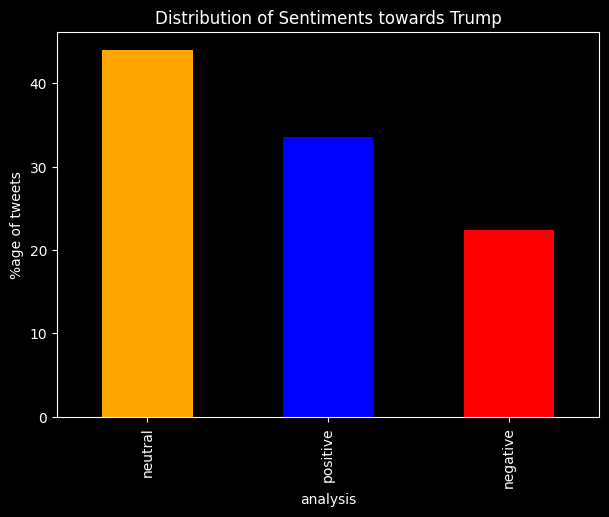

In [30]:
# how much data is positive/negetive/neutral
plt.style.use('dark_background') # Adding black theme

# Define colors for each bar
colors = ['orange', 'blue', 'red']

plt.figure(figsize=(7, 5))
(trump_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)
plt.ylabel("%age of tweets")
plt.title("Distribution of Sentiments towards Trump")
plt.show()

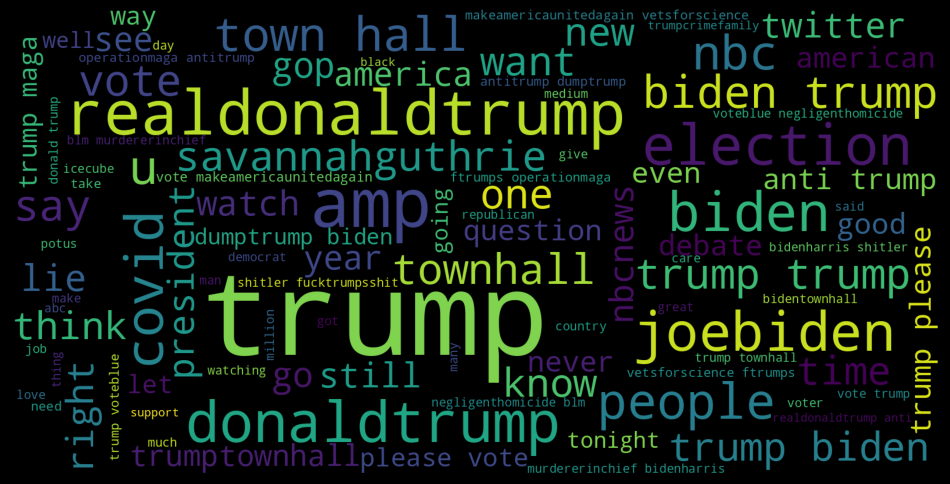

In [31]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def word_cloud(wd_list):
	stopwords = set(STOPWORDS)
	all_words = ' '.join(wd_list)
	wordcloud = WordCloud(background_color='black',
						stopwords=stopwords,
						width=1600, height=800, max_words=100, max_font_size=200,
						colormap="viridis").generate(all_words)
	plt.figure(figsize=(12, 10))
	plt.axis('off')
	plt.imshow(wordcloud)

word_cloud(trump_tweets['cleantext'][:5000])

In [32]:
biden_tweets = data[data['candidate'] == 'biden']
biden_tweets = biden_tweets.loc[biden_tweets.country == 'US']
biden_tweets = biden_tweets[['tweet']]
biden_tweets

,tweet
6,"In 2020, #NYPost is being #censorship #CENSORE..."
17,"Comments on this? ""Do Democrats Understand how..."
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...
...,...
776836,"#Biden 🗽🇺🇸👍🏽 | Images 📷 @ Santa Maria, CA. | ..."
776845,Will #criticalRaceTheory become ubiquitous in ...
776847,You moving near #Biden 🤔 https://t.co/1F6i1YIJ2P
776861,#election #2020Elections #trump #biden https:/...


In [33]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean)
biden_tweets.head()

,tweet,cleantext
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,realjameswoods bidencrimefamily joebiden hunte...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come abc please right thing move biden town ha...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...


In [34]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity)
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity)
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis)
biden_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...,1.000000,-1.000000,negative
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,realjameswoods bidencrimefamily joebiden hunte...,0.000000,0.000000,neutral
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come abc please right thing move biden town ha...,0.178571,0.078571,positive
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...,0.000000,0.000000,neutral


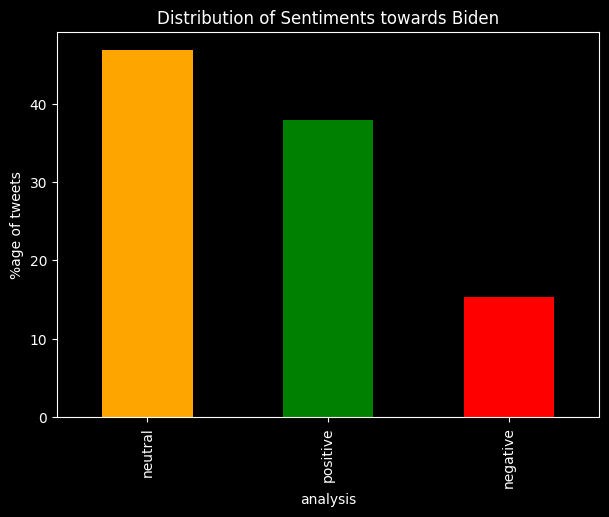

In [35]:
# how much data is positive/negetive/neutral
plt.style.use('dark_background')

# Define colors for each bar
colors = ['orange', 'green', 'red']

plt.figure(figsize=(7, 5))
(biden_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)
plt.ylabel("%age of tweets")
plt.title("Distribution of Sentiments towards Biden")
plt.show()

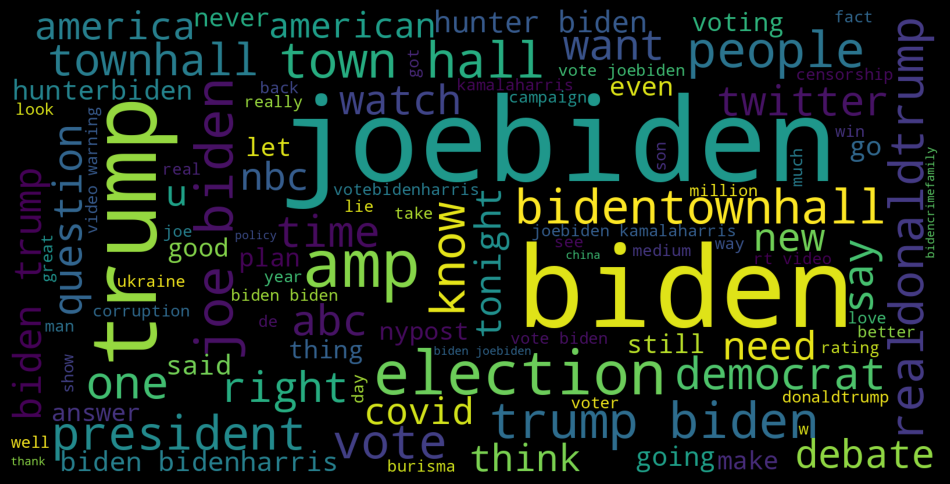

In [36]:
word_cloud(biden_tweets['cleantext'][:5000])

In [37]:
trump_tweets.analysis.value_counts(normalize=True)*100

,proportion
analysis,
neutral,43.992051
positive,33.579309
negative,22.428639


In [38]:
biden_tweets.analysis.value_counts(normalize=True)*100

,proportion
analysis,
neutral,46.830690
positive,37.887127
negative,15.282183
